# 📝 Exercise M4.05
In the previous notebook we set `penalty="none"` to disable regularization
entirely. This parameter can also control the **type** of regularization to use,
whereas the regularization **strength** is set using the parameter `C`.
Setting`penalty="none"` is equivalent to an infinitely large value of `C`.
In this exercise, we ask you to train a logistic regression classifier using the
`penalty="l2"` regularization (which happens to be the default in scikit-learn)
to find by yourself the effect of the parameter `C`.

We will start by loading the dataset and create the helper function to show
the decision separation as in the previous code.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [25]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_classification.csv")
# only keep the Adelie and Chinstrap classes
penguins = penguins.set_index("Species").loc[
    ["Adelie", "Chinstrap"]].reset_index()

culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

In [26]:
from sklearn.model_selection import train_test_split

penguins_train, penguins_test = train_test_split(penguins, random_state=0)

data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]

target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

range_features = {
    feature_name: (penguins[feature_name].min() - 1,
                   penguins[feature_name].max() + 1)
    for feature_name in culmen_columns
}

First, let's create our predictive model.

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

model = make_pipeline(StandardScaler(), LogisticRegression(penalty="l2"))

Given the following candidates for the `C` parameter, find out the impact of
`C` on the classifier decision boundary. You can import the helper class with
`from helpers.plotting import DecisionBoundaryDisplay` to plot the decision
function boundary. Use the method `from_estimator` from this class.

In [28]:
import numpy as np


def plot_decision_function(fitted_classifier, range_features, ax=None):
    """Plot the boundary of the decision function of a classifier."""
    from sklearn.preprocessing import LabelEncoder

    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step),
    )

    # compute the associated prediction
    Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # make the plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="RdBu_r")

    return ax

In [29]:
import seaborn as sb

/home/meridolian/miniconda3/envs/learning/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


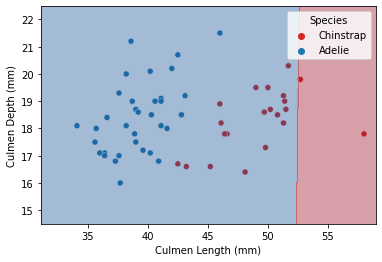

In [30]:
model.set_params(logisticregression__C=0.01)
model.fit(data_train, target_train)
ax = sb.scatterplot(
    data = penguins_test, x=culmen_columns[0], y=culmen_columns[1],
    hue = target_column, palette=["tab:red", "tab:blue"]
)
_ = plot_decision_function(model, range_features, ax=ax)

/home/meridolian/miniconda3/envs/learning/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


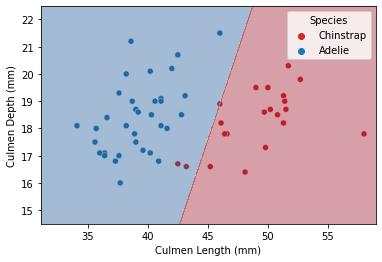

In [31]:
model.set_params(logisticregression__C=0.1)
model.fit(data_train, target_train)
ax = sb.scatterplot(
    data = penguins_test, x=culmen_columns[0], y=culmen_columns[1],
    hue = target_column, palette=["tab:red", "tab:blue"]
)
_ = plot_decision_function(model, range_features, ax=ax)

/home/meridolian/miniconda3/envs/learning/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


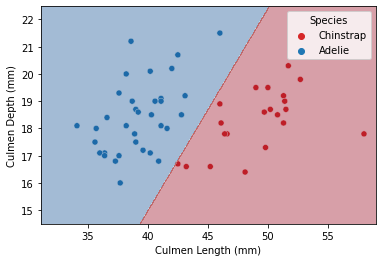

In [32]:
model.set_params(logisticregression__C=1)
model.fit(data_train, target_train)
ax = sb.scatterplot(
    data = penguins_test, x=culmen_columns[0], y=culmen_columns[1],
    hue = target_column, palette=["tab:red", "tab:blue"]
)
_ = plot_decision_function(model, range_features, ax=ax)

/home/meridolian/miniconda3/envs/learning/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


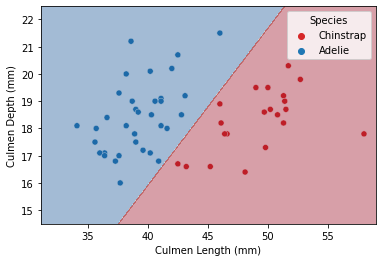

In [33]:
model.set_params(logisticregression__C=10)
model.fit(data_train, target_train)
ax = sb.scatterplot(
    data = penguins_test, x=culmen_columns[0], y=culmen_columns[1],
    hue = target_column, palette=["tab:red", "tab:blue"]
)
_ = plot_decision_function(model, range_features, ax=ax)

Look at the impact of the `C` hyperparameter on the magnitude of the weights.

In [ ]:
# Write your code here.